In [19]:
import cf_xarray
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

ds = xr.open_dataset('rtofs_glo_2ds_f034_diag.nc')
ds

<xarray.Dataset>
Dimensions:                           (MT: 1, Y: 3298, X: 4500)
Coordinates:
  * MT                                (MT) datetime64[ns] 2023-09-21T10:00:00
    Date                              (MT) float64 ...
  * Y                                 (Y) int32 1 2 3 4 ... 3295 3296 3297 3298
  * X                                 (X) int32 1 2 3 4 ... 4497 4498 4499 4500
    Latitude                          (Y, X) float32 ...
    Longitude                         (Y, X) float32 ...
Data variables:
    ssh                               (MT, Y, X) float32 ...
    u_barotropic_velocity             (MT, Y, X) float32 ...
    v_barotropic_velocity             (MT, Y, X) float32 ...
    surface_boundary_layer_thickness  (MT, Y, X) float32 ...
    mixed_layer_thickness             (MT, Y, X) float32 ...
Attributes:
    Conventions:  CF-1.0
    title:        HYCOM ATLb2.00
    institution:  National Centers for Environmental Prediction
    source:       HYCOM archive file
    experiment:   92.8
    history:      archv2ncdf2d

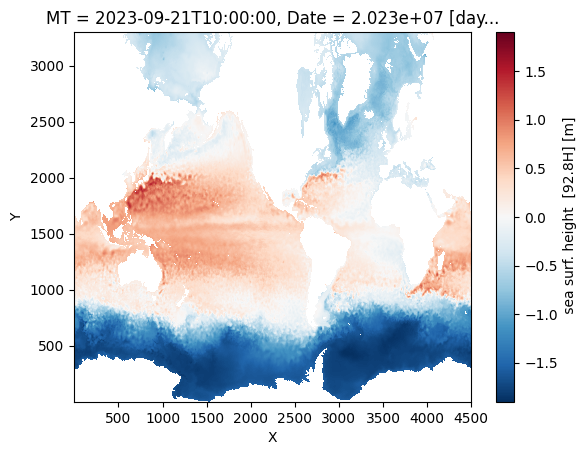

In [20]:
ds.ssh.plot()

/var/folders/b2/s20v34y16hg9263q_zf2y1740000gn/T/ipykernel_48910/49479884.py:12: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lon, lat, ssh, edgecolor='none')


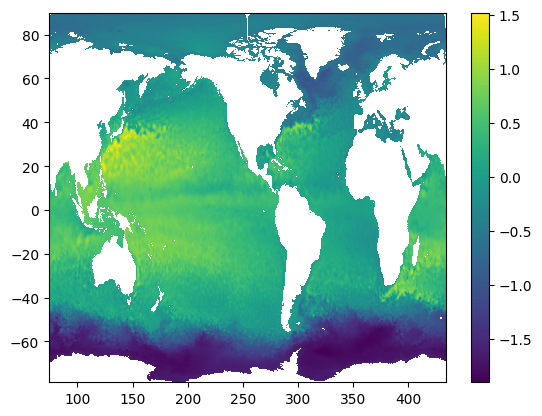

In [35]:
ssh = ds.ssh.isel(MT=0)
lon = ds.Longitude
lat = ds.Latitude

mask = lon > 500
ssh = np.ma.masked_where(mask == True, ssh)
ssh[:-1,:] = np.ma.masked_where(mask[1:,:] == True, ssh[:-1,:])
ssh[:,:-1] = np.ma.masked_where(mask[:,1:] == True, ssh[:,:-1])
ssh[1:,:] = np.ma.masked_where(mask[:-1,:] == True, ssh[1:,:])
ssh[:,1:] = np.ma.masked_where(mask[:,:-1] == True, ssh[:,1:])

plt.pcolormesh(lon, lat, ssh, edgecolor='none')
plt.xlim(74.160034, 434.11987)
plt.colorbar()